## 数据整理

In [1]:
# 导包
import pandas as pd
import numpy as np
import re

In [7]:
# 导入爬取得到的数据
df = pd.read_csv("粽子.csv", engine='python', encoding='utf-8-sig', header=None)
df.columns = ["商品名", "价格", "付款人数", "店铺", "发货地址"]
df.head(10)

,商品名,价格,付款人数,店铺,发货地址
0,三全端午龙舟粽多口味甜粽子12只粽子豆沙/八宝/蜜枣/八宝粽1200g,49.9,6000+人付款,三全食品官方旗舰店,河南 郑州
1,吴越斋粽子招牌套装蛋黄五花肉8只装各2只装现做现售早餐散装即食,139.0,3879人付款,liyan15854786720,上海
2,五芳斋粽子礼盒装肉粽嘉兴特产蛋黄鲜肉粽大肉多口味端午节送礼品,69.9,2526人付款,久味食品专营店,浙江 嘉兴
3,海鲜鲍鱼烧肉粽板栗咸蛋黄手工新鲜大粽子端午节送礼品团购礼盒装,298.0,613人付款,草帽路飞食品旗舰店,福建 福州
4,五芳斋粽子礼盒装蛋黄肉粽大肉粽官方旗舰店端午团购礼品嘉兴特产,64.9,1621人付款,禾乡缘,浙江 嘉兴
5,真真老老臻瑞礼盒10粽4蛋1.12kg/盒嘉兴粽子端午节粽子礼盒装,99.0,2948人付款,天猫超市,上海
6,端午节大粽子水晶粽礼盒装 绿豆糕棕子高端送礼团购定制伴手礼品,218.0,873人付款,yotime旗舰店,浙江 温州
7,锋味贵刁粽子礼盒装豆沙巧克力脏脏甜粽鲜肉海鲜粽端午节礼品礼盒,178.0,1480人付款,锋味旗舰店,天津
8,红船浙江嘉兴特产手工粽子12只鲜肉棕子端午节团购批发粽子礼盒装,39.9,2.5万+人付款,红船旗舰店,浙江 嘉兴
9,五芳斋粽子 盛世五芳礼品粽粽子礼盒 传世臻粽端午节礼品嘉兴粽子,399.0,1417人付款,五芳斋官方旗舰店,浙江 嘉兴


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 5 columns):
商品名     4312 non-null object
价格      4312 non-null float64
付款人数    4242 non-null object
店铺      4312 non-null object
发货地址    4312 non-null object
dtypes: float64(1), object(4)
memory usage: 168.5+ KB


In [6]:
df.describe()

,价格
count,2508.000000
mean,72.703313
std,80.734778
min,2.900000
25%,27.800000
50%,49.900000
75%,89.900000
max,1780.000000


In [3]:
# 去除重复值
df.drop_duplicates(inplace=True)

In [4]:
# 处理购买人数为空的记录
df['付款人数']=df['付款人数'].replace(np.nan,'0人付款')

In [5]:
# 提取数值
df['num'] = [re.findall(r'(\d+\.{0,1}\d*)', i)[0] for i in df['付款人数']]  # 提取数值
df['num'] = df['num'].astype('float')  # 转化数值型
# 提取单位（万）
df['unit'] = [''.join(re.findall(r'(万)', i)) for i in df['付款人数']]  # 提取单位（万）
df['unit'] = df['unit'].apply(lambda x:10000 if x=='万' else 1)
# 计算销量
df['销量'] = df['num'] * df['unit']

In [6]:
# 删除无发货地址的商品，并提取省份
df = df[df['发货地址'].notna()]
df['省份'] = df['发货地址'].str.split(' ').apply(lambda x:x[0])

In [7]:
# 删除多余的列
df.drop(['付款人数', '发货地址', 'num', 'unit'], axis=1, inplace=True)

# 重置索引
df = df.reset_index(drop=True)
df.head(10) 
#df.to_csv('清洗完成数据.csv')

,商品名,价格,店铺,销量,省份
0,五芳斋粽子礼盒 心悦+18只装咸鸭蛋组合端午节礼品团购嘉兴肉粽子,129.0,五芳斋官方旗舰店,6.0,浙江
1,北京稻香村端午粽子手工豆沙粽220g*2袋散装豆沙粽香甜软糯豆沙粽,44.0,天猫超市,8.0,上海
2,五芳斋粽子礼盒装鲜肉咸蛋黄大肉粽嘉兴豆沙甜粽端午团购散装礼品,89.9,五芳斋官方旗舰店,1000000.0,浙江
3,稻香私房鲜肉粽蛋黄肉粽嘉兴粽子咸鸭蛋礼盒装端午节送礼特产团购,138.0,稻香村食品旗舰店,1936.0,北京
4,嘉兴粽子 蛋黄鲜肉粽新鲜大肉粽早餐散装团购浙江特产蜜枣多口味,3.8,城城喂食猫,9500.0,浙江
5,嘉兴特产粽子礼盒装甜咸粽8粽4味真空手工农家粽端午节团购,58.8,chenyan30151467,17.0,浙江
6,五芳斋华礼竹篮礼盒1360g蛋粽组合端午礼品嘉兴粽子礼盒,159.0,天猫超市,1028.0,上海
7,五芳斋 140g*8只大粽子 福韵端午豆沙蜜枣蛋黄粽新包装送礼礼盒,79.9,天猫超市,9000.0,上海
8,真真老老嘉情礼盒10粽6蛋1.52kg/盒嘉兴粽子端午节粽子礼盒装,109.0,天猫超市,2117.0,上海
9,五芳斋嘉兴粽子新鲜量贩蛋黄肉粽豆沙粽悦喜散装端午特产600g*2袋,59.9,天猫超市,1349.0,上海


In [8]:
df1 = df.sort_values(by="价格", axis=0, ascending=False)
df1.iloc[:5,:]

,商品名,价格,店铺,销量,省份
2779,御茶膳房端午节礼品黄酒有机粽子咸鸭蛋手提竹篮礼盒装高端大礼包,1780.0,御茶膳房旗舰店,12.0,北京
2491,御茶膳房端午节礼品有机粽子咸鸭蛋手提竹篮礼盒装高端大礼包,1088.0,御茶膳房旗舰店,9.0,北京
152,端午节礼品礼盒装组合高档有机粽子咸鸭蛋送领导高端送礼大礼包,858.0,御茶膳房旗舰店,45.0,北京
784,嘉兴粽子新鲜大肉粽蛋黄肉粽甜粽竹篮粽子礼盒装组合端午送礼团购,857.9,千味食代i,2491.0,浙江
2710,米旗端午节粽子礼盒壹品私房多口味肉粽素棕海鲜粽高档礼盒送礼,678.0,壹品优店,5.0,北京


## 数据可视化

### 分词

In [9]:
import jieba
import jieba.analyse

txt = df['商品名'].str.cat(sep='。')

# 添加关键词
jieba.add_word('粽子', 999, '五芳斋')

# 读入停用词表
stop_words = []
with open('stop_words.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        stop_words.append(line.strip())

# 添加停用词
stop_words.extend(['logo', '10', '100', '200g', '100g', '140g', '130g'])  

# 评论字段分词处理
word_num = jieba.analyse.extract_tags(txt,
                                      topK=100,
                                      withWeight=True,
                                      allowPOS=())

# 去停用词
word_num_selected = []

for i in word_num:
    if i[0] not in stop_words:
        word_num_selected.append(i)

key_words = pd.DataFrame(word_num_selected, columns=['words','num'])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\admin\AppData\Local\Temp\jieba.cache
Loading model cost 0.782 seconds.
Prefix dict has been built successfully.


### 查询你的pyecharts版本

In [10]:
import pyecharts

print(pyecharts.__version__)

1.7.1


### 商品销量排名top10 - 柱形图

In [11]:
# 导入包
from pyecharts.charts import Bar
from pyecharts import options as opts 

# 计算top10店铺
shop_top10 = df.groupby('商品名')['销量'].sum().sort_values(ascending=False).head(10)

# 绘制柱形图
bar0 = Bar(init_opts=opts.InitOpts(width='1350px', height='750px')) 
bar0.add_xaxis(shop_top10.index.tolist())
bar0.add_yaxis('sales_num', shop_top10.values.tolist()) 
bar0.set_global_opts(title_opts=opts.TitleOpts(title='粽子商品销量Top10'),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15)),
                     visualmap_opts=opts.VisualMapOpts(max_=shop_top10.values.max())) 
bar0.render("粽子商品销量Top10.html")

'C:\\Users\\admin\\粽子-凹凸数据\\粽子商品销量Top10.html'

### 店铺销量排名top10 - 柱形图

In [12]:
# 导入包
from pyecharts.charts import Bar
from pyecharts import options as opts 

# 计算top10店铺
shop_top10 = df.groupby('店铺')['销量'].sum().sort_values(ascending=False).head(10)

# 绘制柱形图
bar1 = Bar(init_opts=opts.InitOpts(width='1350px', height='750px')) 
bar1.add_xaxis(shop_top10.index.tolist())
bar1.add_yaxis('sales_num', shop_top10.values.tolist()) 
bar1.set_global_opts(title_opts=opts.TitleOpts(title='粽子店铺销量Top10'),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15)),
                     visualmap_opts=opts.VisualMapOpts(max_=shop_top10.values.max())) 
bar1.render("粽子店铺销量Top10.html")

'C:\\Users\\admin\\粽子-凹凸数据\\粽子店铺销量Top10.html'

### 全国省份销量地区分布-地图

In [13]:
from pyecharts.charts import Map 

# 计算销量
province_num = df.groupby('省份')['销量'].sum().sort_values(ascending=False) 

# 绘制地图
map1 = Map(init_opts=opts.InitOpts(width='1350px', height='750px'))
map1.add("", [list(z) for z in zip(province_num.index.tolist(), province_num.values.tolist())],
         maptype='china'
        ) 
map1.set_global_opts(title_opts=opts.TitleOpts(title='各省份粽子销量分布'),
                     visualmap_opts=opts.VisualMapOpts(max_=300000),
                     toolbox_opts=opts.ToolboxOpts()
                    )
map1.render("各省份粽子销量分布.html")

'C:\\Users\\admin\\粽子-凹凸数据\\各省份粽子销量分布.html'

### 不同价格区间的销量占比

In [14]:
from pyecharts.charts import Pie

def price_range(x): #按照淘宝推荐划分价格区间
    if x <= 22:
        return '22元以下'
    elif x <= 115:
        return '22-115元'
    elif x <= 633:
        return '115-633元'
    else:
        return '633元以上'

df['price_range'] = df['价格'].apply(lambda x: price_range(x)) 
price_cut_num = df.groupby('price_range')['销量'].sum() 
data_pair = [list(z) for z in zip(price_cut_num.index, price_cut_num.values)]
print(data_pair)


# 饼图
pie1 = Pie(init_opts=opts.InitOpts(width='1350px', height='750px'))
# 内置富文本
pie1.add( 
        series_name="销量",
        radius=["35%", "55%"],
        data_pair=data_pair,
        label_opts=opts.LabelOpts(formatter='{{b}—占比{d}%}'),
)

pie1.set_global_opts(legend_opts=opts.LegendOpts(pos_left="left", pos_top='30%', orient="vertical"), 
                     toolbox_opts=opts.ToolboxOpts(),
                     title_opts=opts.TitleOpts(title='不同价格区间的粽子销量占比'))

pie1.render("不同价格区间的粽子销量占比.html")

[['115-633元', 150371.0], ['22-115元', 4297601.0], ['22元以下', 1080993.0], ['633元以上', 2562.0]]


'C:\\Users\\admin\\粽子-凹凸数据\\不同价格区间的粽子销量占比.html'

### 商品标题文本分析 - 词云图

In [15]:
from pyecharts.charts import WordCloud
from pyecharts.globals import SymbolType

# 词云图
word1 = WordCloud(init_opts=opts.InitOpts(width='1350px', height='750px'))
word1.add("", [*zip(key_words.words, key_words.num)],
          word_size_range=[20, 200],
          shape=SymbolType.DIAMOND)
word1.set_global_opts(title_opts=opts.TitleOpts('粽子商品名称词云图'),
                      toolbox_opts=opts.ToolboxOpts())
word1.render("粽子商品名称词云图.html")

'C:\\Users\\admin\\粽子-凹凸数据\\粽子商品名称词云图.html'

## 关注公众号

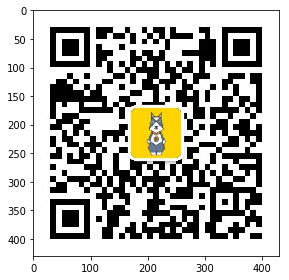

In [17]:
img_src = 'http://note.youdao.com/yws/public/resource/8171065fb7d978eb589a16c6a64d70f4/xmlnote/WEBRESOURCEf000a60369f9467f8e4eff640b2159ff/3904'
from skimage import io
image = io.imread(img_src)
io.imshow(image)
io.show()